In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import math
import sqlite3
import matplotlib.pyplot as plt
from collections import OrderedDict

In [5]:
data_user = pd.read_json("dataset/user.json", lines=True)

In [6]:
data_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,...,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,...,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


Since our data contains a lot of information we are currently not intrested in, let's get rid of some of it.  

# Fans

After looking at the Yelp dataset, one thing really cought our eyes. While Yelp is primely  a crowd-sourced reviews about local businesses, we were very suprised to see under the user dataset a column of "Fans", as if Yelp is some social media platform. We decicded to try to understand why someone would have many fans, or what would make someone want to be someone else's fan.

Our hypotheses is that if one's rating is close to the actual rating this would be a reason to be his or hers fan, meaning that this user is a good reviewer. So we are expecting to see a positive correlation between the number of fans and how close the user's rating is to the actual rating of the business

Since our dataset is very large so we will pick the data we are intrested in. Also, we are going to look at users with more than 10 fans, any number less than that is just simply insignificant

In [7]:
col_to_remove = [col for col in data_user.columns if (col != 'fans' and col != 'user_id')]
data_user.drop(columns=col_to_remove, inplace=True)

In [8]:
data_user = data_user[data_user['fans'] > 10]

In [9]:
data_review = pd.read_json("dataset/review.json", lines=True, chunksize = 10000000)
for df_review in data_review:
    break

In [10]:
df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [11]:
col_to_remove = [col for col in df_review.columns if (col != 'business_id' and col != 'stars' and col !='user_id')]
df_review.drop(columns=col_to_remove, inplace=True)
df_review.head()

,business_id,stars,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,5,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,3,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,3,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,4,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,5,0xtbPEna2Kei11vsU-U2Mw


In [12]:
df_business = pd.read_json("dataset/business.json", lines=True)

In [13]:
col_to_remove = [col for col in df_business.columns if (col != 'business_id' and col != 'stars')]
df_business.drop(columns=col_to_remove, inplace=True)

Now let's merge the user database with the review database. By doing so we would get each user's review and rating for each business they reviewed

In [14]:
df_merge = data_user.merge(df_review, how='inner', left_on='user_id', right_on='user_id')

Now we change the business stars columns to business_stars not to be mixed up with the users stars

In [15]:
df_business.rename(columns={'stars': 'business_stars'}, inplace=True)
df_business.head()

,business_id,business_stars
0,YDf95gJZaq05wvo7hTQbbQ,2.0
1,mLwM-h2YhXl2NCgdS84_Bw,4.5
2,v2WhjAB3PIBA8J8VxG3wEg,4.5
3,CVtCbSB1zUcUWg-9TNGTuQ,3.0
4,duHFBe87uNSXImQmvBh87Q,4.5


And now we merge it all

In [16]:
df_merge_all = df_merge.merge(df_business, how='inner', left_on='business_id', right_on='business_id')

In [17]:
df_merge_all.head()

,fans,user_id,business_id,stars,business_stars
0,209,lsSiIjAKVl-QRxKjRErBeg,J4CATH00YZrq8Bne2S4_cw,3,4.0
1,17,N2arP_u4sMGLgOZhA6ZFoQ,J4CATH00YZrq8Bne2S4_cw,5,4.0
2,13,tjufYqU4PWkP2j6vAFsCFw,J4CATH00YZrq8Bne2S4_cw,5,4.0
3,22,XHHUypDIxHvykpqd7pjydw,J4CATH00YZrq8Bne2S4_cw,4,4.0
4,13,zMLbjqeTqp83g0uIAk0SWg,J4CATH00YZrq8Bne2S4_cw,5,4.0


As we can see from the dataframe above we have all the information we need
Now we spilt the users into bins depending on the number of fans they have

In [18]:
max_fans = np.max(df_merge_all['fans'])
bins = np.linspace(0, max_fans, num=10)
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, max_fans]
df_merge_all['fans_class'] = pd.cut(df_merge_all['fans'], bins=bins, include_lowest=True, right=True)

If we group our users by the number of fans they have, we get the following

In [19]:
df_merge_all.groupby('fans_class').size()

fans_class
(-0.001, 200.0]     713684
(200.0, 400.0]       24367
(400.0, 600.0]       14085
(600.0, 800.0]        3990
(800.0, 1000.0]        845
(1000.0, 1200.0]       173
(1200.0, 1400.0]       313
(1400.0, 1600.0]       126
(1600.0, 1800.0]       127
(1800.0, 2000.0]        76
(2000.0, 6087.0]        32
dtype: int64

Now to compare the user's rating vs the actual rating, we simply take the difference berween the two 

In [20]:
df_merge_all['user_vs_bus'] = (df_merge_all['stars']-df_merge_all['business_stars']).apply(lambda x : math.fabs(x))

In [21]:
df_merge_all.head()

,fans,user_id,business_id,stars,business_stars,fans_class,user_vs_bus
0,209,lsSiIjAKVl-QRxKjRErBeg,J4CATH00YZrq8Bne2S4_cw,3,4.0,"(200.0, 400.0]",1.0
1,17,N2arP_u4sMGLgOZhA6ZFoQ,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0
2,13,tjufYqU4PWkP2j6vAFsCFw,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0
3,22,XHHUypDIxHvykpqd7pjydw,J4CATH00YZrq8Bne2S4_cw,4,4.0,"(-0.001, 200.0]",0.0
4,13,zMLbjqeTqp83g0uIAk0SWg,J4CATH00YZrq8Bne2S4_cw,5,4.0,"(-0.001, 200.0]",1.0


Now we can get group the users accoring to the number of fans they have and get the the mean of how far the users were off from the actuall rating

In [22]:
dt = df_merge_all.groupby('fans_class')['user_vs_bus'].mean()

In [23]:
dt

fans_class
(-0.001, 200.0]     0.762726
(200.0, 400.0]      0.678910
(400.0, 600.0]      0.657047
(600.0, 800.0]      0.662657
(800.0, 1000.0]     0.640237
(1000.0, 1200.0]    0.569364
(1200.0, 1400.0]    0.680511
(1400.0, 1600.0]    0.646825
(1600.0, 1800.0]    0.751969
(1800.0, 2000.0]    0.802632
(2000.0, 6087.0]    0.671875
Name: user_vs_bus, dtype: float64

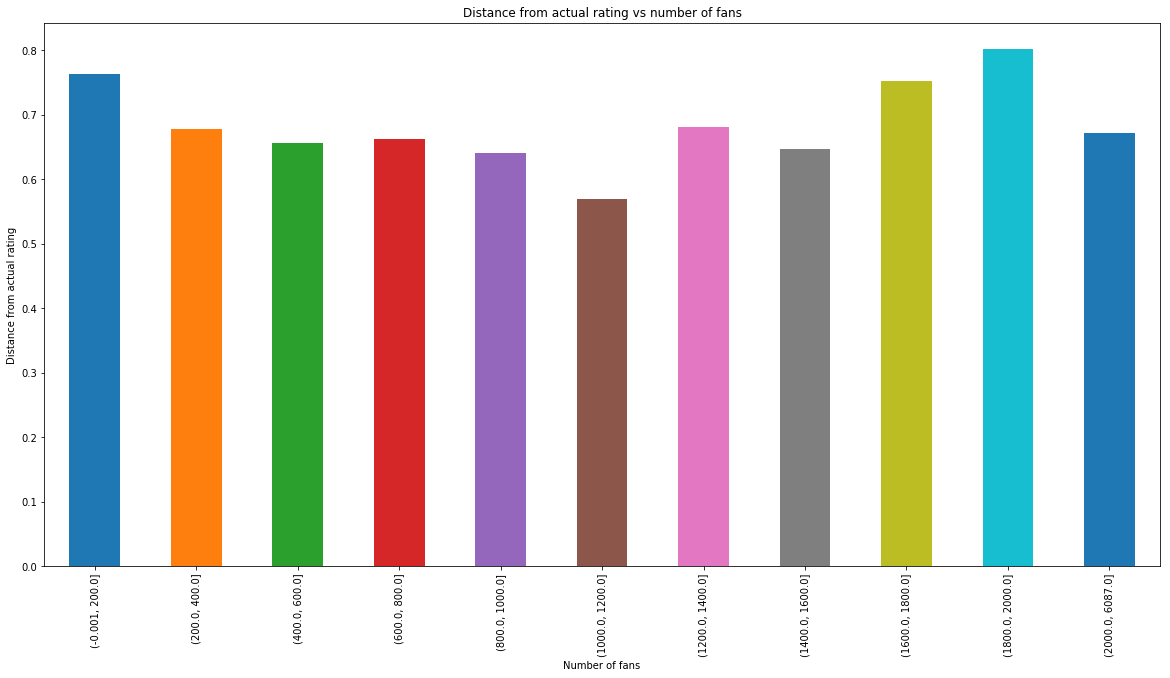

In [24]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Distance from actual rating')
plt.title('Distance from actual rating vs number of fans')
plt.show()

So looking at the graph above or just looking at the means for each class, we observe something intresting. As one would expect as the number of fans increase, the users rating is closer to the actual rating, but we can see that starting with users that have number of fans somewhere between 1000-1200, the error actually grows. So we can conclude that the number of fans is not necessarily driven by how close the users rating is compare to the actuall rating 

So let's look at other attributes users have that can possibly be the reason that will explain why would one have fans

In [25]:
data_user = pd.read_json("dataset/user.json", lines=True)

In [26]:
max_fans = np.max(data_user['fans'])
bins = np.linspace(0, max_fans, num=10)
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, max_fans]
data_user['fans_class'] = pd.cut(data_user['fans'], bins=bins, include_lowest=True, right=True)

In [27]:
data_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since,fans_class
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13,"(200.0, 400.0]"
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18,"(800.0, 1000.0]"
2,4.72,15,1,15,5,0,1,11,8,20,...,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31,"(-0.001, 200.0]"
3,3.76,9,0,9,1,0,1,4,1,11,...,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01,"(-0.001, 200.0]"
4,4.23,276,0,276,59,0,8,51,169,386,...,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16,"(-0.001, 200.0]"


In [28]:
dt = data_user.groupby('fans_class')[['fans', 'funny', 'review_count', 'useful', 'cool']].mean()
dt.corr()

,fans,funny,review_count,useful,cool
fans,1.000000,0.153339,0.435410,0.493583,0.525660
funny,0.153339,1.000000,0.448898,0.673192,0.780342
review_count,0.435410,0.448898,1.000000,0.537248,0.539936
useful,0.493583,0.673192,0.537248,1.000000,0.962144
cool,0.525660,0.780342,0.539936,0.962144,1.000000


In [29]:
dt = data_user.groupby('fans_class')['funny'].mean()
dt

fans_class
(-0.001, 200.0]        11.422494
(200.0, 400.0]       6332.000000
(400.0, 600.0]       8228.354167
(600.0, 800.0]       8565.411765
(800.0, 1000.0]     22994.150000
(1000.0, 1200.0]    10326.666667
(1200.0, 1400.0]    15751.333333
(1400.0, 1600.0]     3679.333333
(1600.0, 1800.0]     8041.750000
(1800.0, 2000.0]    36240.500000
(2000.0, 6087.0]     4830.000000
Name: funny, dtype: float64

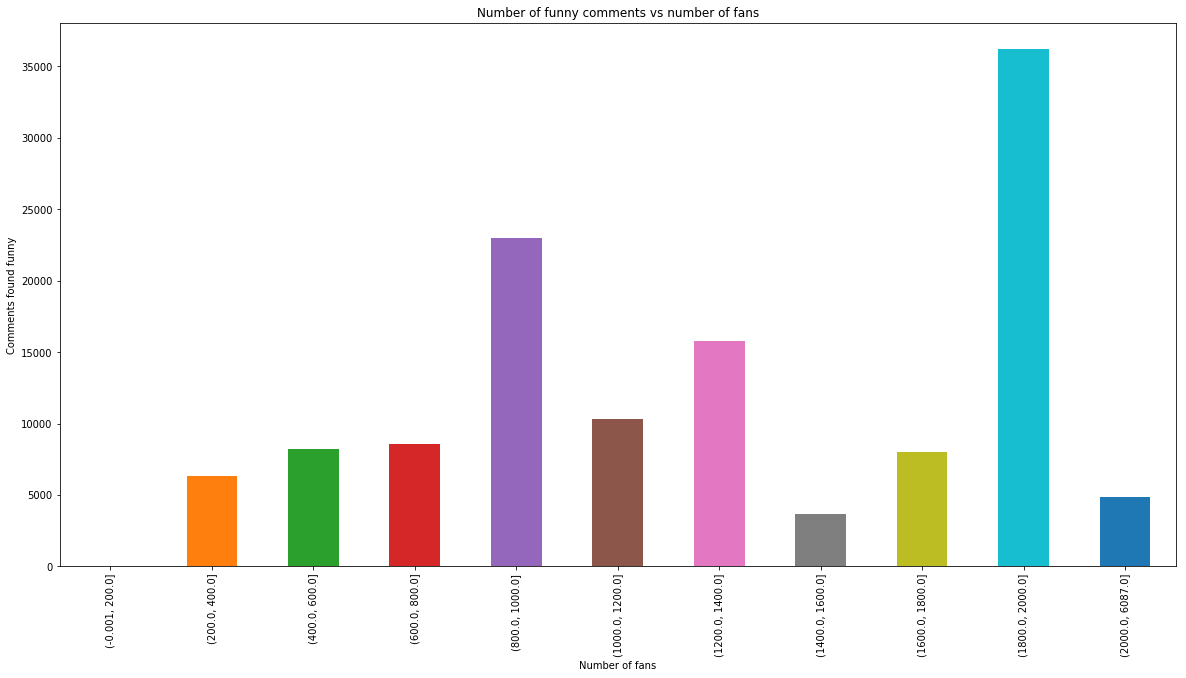

In [30]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Comments found funny')
plt.title('Number of funny comments vs number of fans')
plt.show()

In [31]:
dt = data_user.groupby('fans_class')['review_count'].mean()
dt

fans_class
(-0.001, 200.0]       23.128701
(200.0, 400.0]      1008.645688
(400.0, 600.0]      1338.656250
(600.0, 800.0]      1951.029412
(800.0, 1000.0]     2147.450000
(1000.0, 1200.0]    2481.333333
(1200.0, 1400.0]    1979.000000
(1400.0, 1600.0]    2660.666667
(1600.0, 1800.0]    1798.500000
(1800.0, 2000.0]    2228.000000
(2000.0, 6087.0]    1629.333333
Name: review_count, dtype: float64

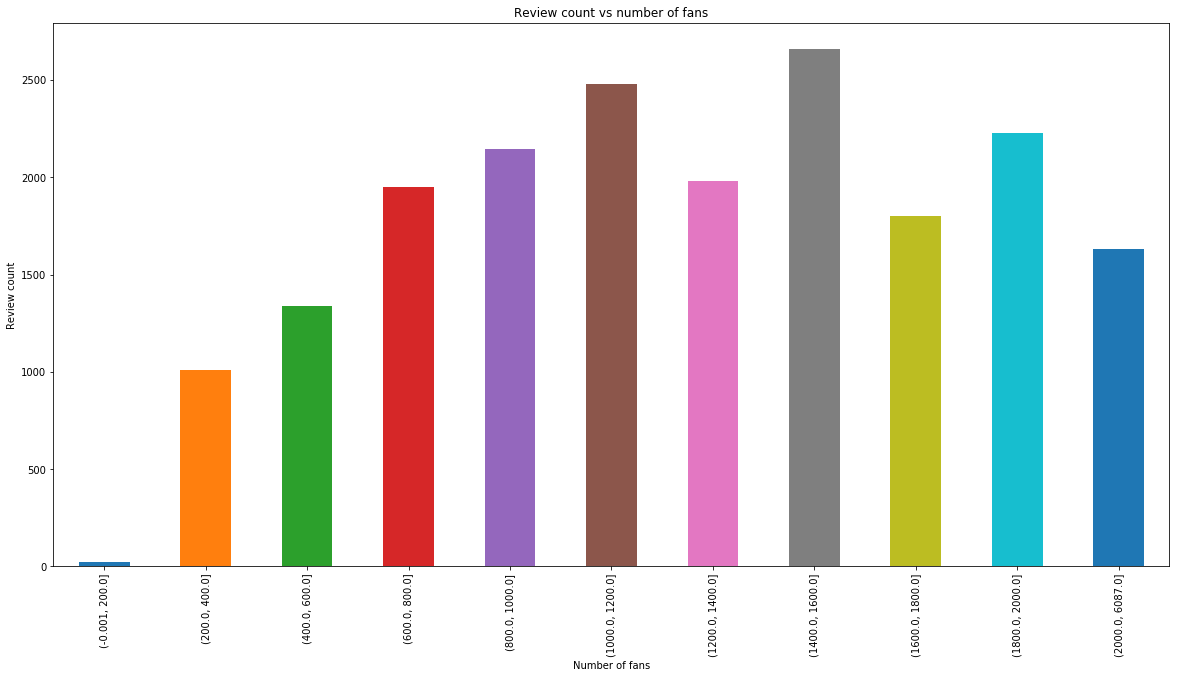

In [32]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Review count')
plt.title('Review count vs number of fans')
plt.show()

In [33]:
dt = data_user.groupby('fans_class')['useful'].mean()
dt

fans_class
(-0.001, 200.0]        23.831338
(200.0, 400.0]       9907.132867
(400.0, 600.0]      14056.166667
(600.0, 800.0]      17489.264706
(800.0, 1000.0]     35263.250000
(1000.0, 1200.0]    27982.500000
(1200.0, 1400.0]    47197.333333
(1400.0, 1600.0]     7581.333333
(1600.0, 1800.0]    32268.250000
(1800.0, 2000.0]    36943.500000
(2000.0, 6087.0]    28985.000000
Name: useful, dtype: float64

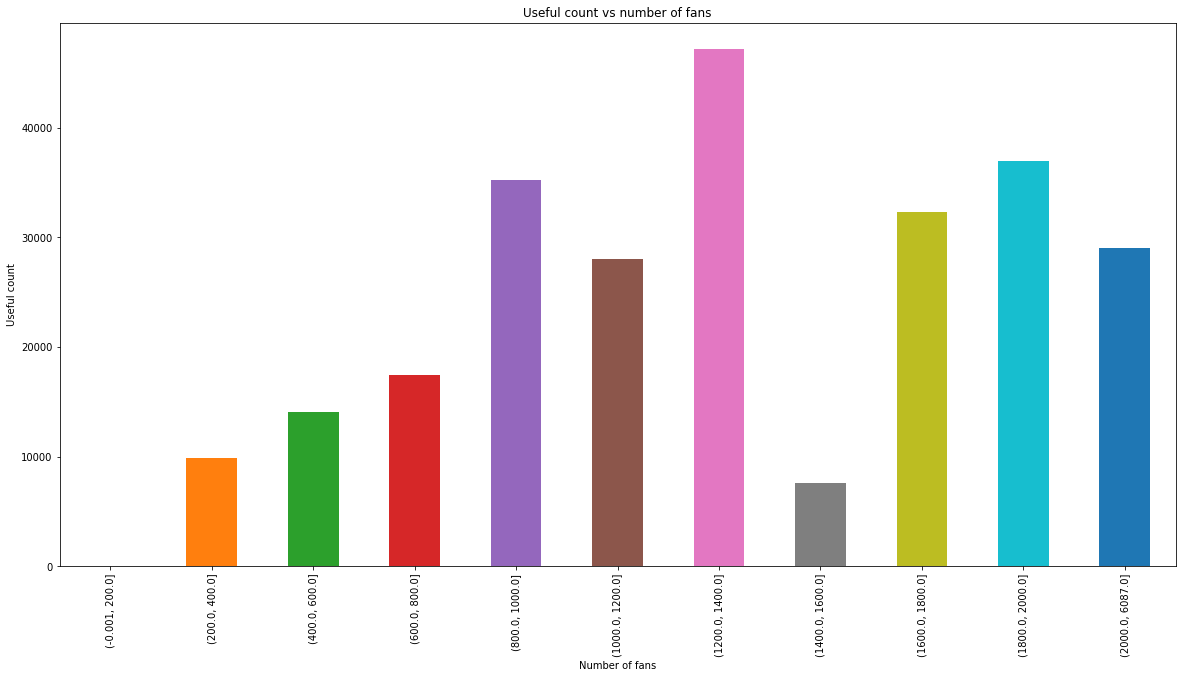

In [34]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Useful count')
plt.title('Useful count vs number of fans')
plt.show()

In [35]:
# for group in data_user.groupby('fans_class'):
#     sum_users = 0
#     for user in group[1]['friends']:
#         sum_users += len(user)
#     print(group[0], float(sum_users)/len(group[1]))
    
dt = data_user.groupby('fans_class').apply(lambda x : np.sum(len(y) for y in x['friends'])/float(len(x)))

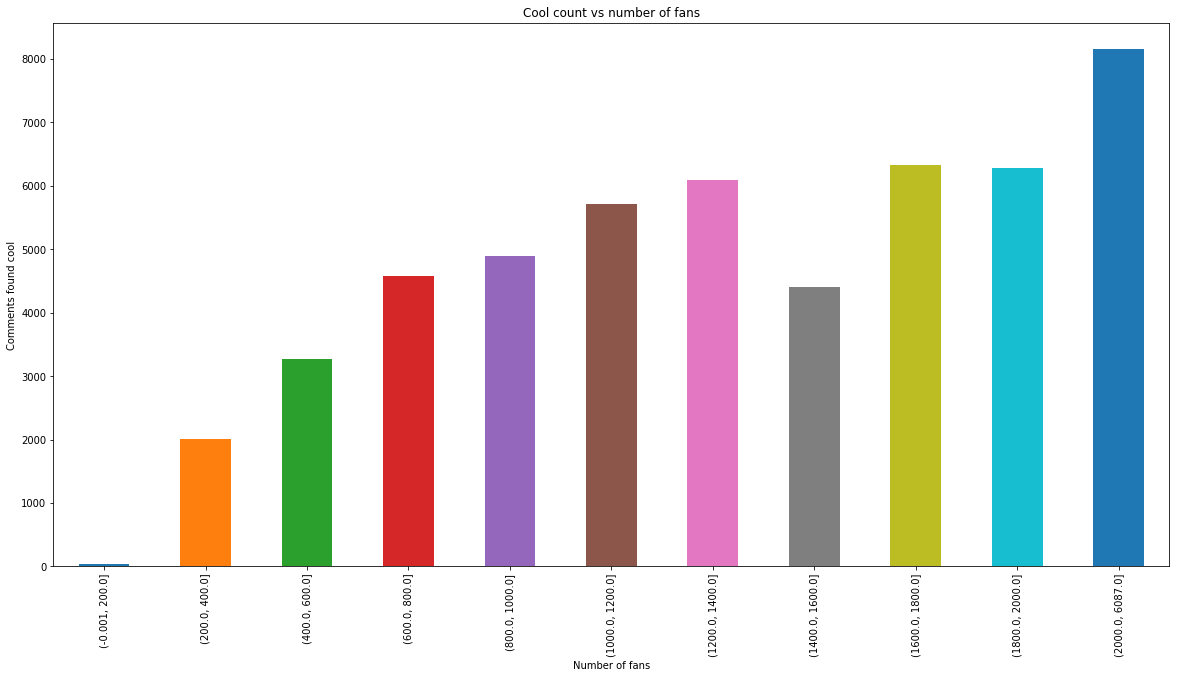

In [36]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Comments found cool')
plt.title('Cool count vs number of fans')
plt.show()

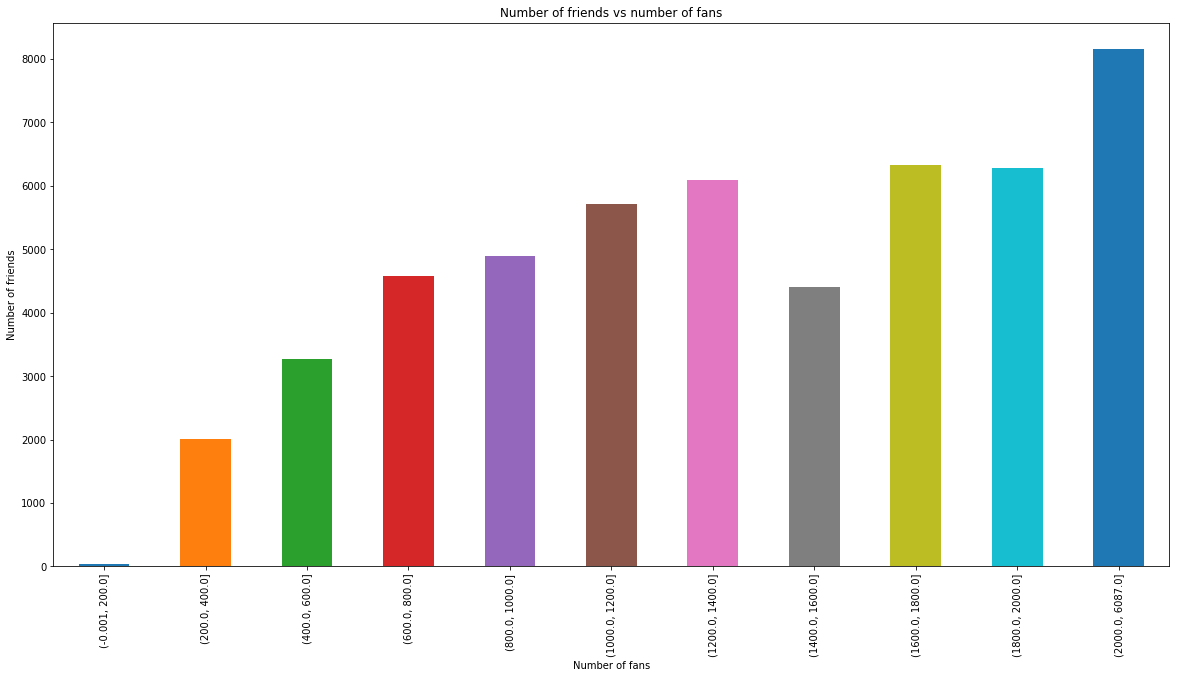

In [37]:
dt.plot.bar()
plt.gcf().set_size_inches(20, 10, forward=True)
plt.xlabel('Number of fans')
plt.ylabel('Number of friends')
plt.title('Number of friends vs number of fans')
plt.show()

In [38]:
dt = data_user.groupby('fans_class')['cool'].mean()
dt

fans_class
(-0.001, 200.0]        14.441344
(200.0, 400.0]       9441.515152
(400.0, 600.0]      12101.958333
(600.0, 800.0]      15563.117647
(800.0, 1000.0]     31306.050000
(1000.0, 1200.0]    21541.500000
(1200.0, 1400.0]    36614.500000
(1400.0, 1600.0]     6897.333333
(1600.0, 1800.0]    19302.000000
(1800.0, 2000.0]    36114.500000
(2000.0, 6087.0]    27144.000000
Name: cool, dtype: float64